In [2]:
%matplotlib inline


151/31 [Fraction(0, 1), Fraction(4, 31), Fraction(3, 31), Fraction(27, 62), Fraction(21, 62), Fraction(0, 1)] [Fraction(0, 1), Fraction(0, 1), Fraction(257, 372), Fraction(9, 62), Fraction(55, 372), Fraction(1, 62)] 

0 [Fraction(1, 3), Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(1, 3), Fraction(1, 3), Fraction(0, 1)] [Fraction(1, 3), Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(1, 3), Fraction(1, 3), Fraction(0, 1)] 

1 [Fraction(1, 2), Fraction(1, 4), Fraction(1, 4)] [Fraction(1, 2), Fraction(1, 2), Fraction(0, 1)] 

0 [Fraction(1, 4), Fraction(1, 2), Fraction(1, 4)] [Fraction(1, 4), Fraction(1, 2), Fraction(1, 4)] 



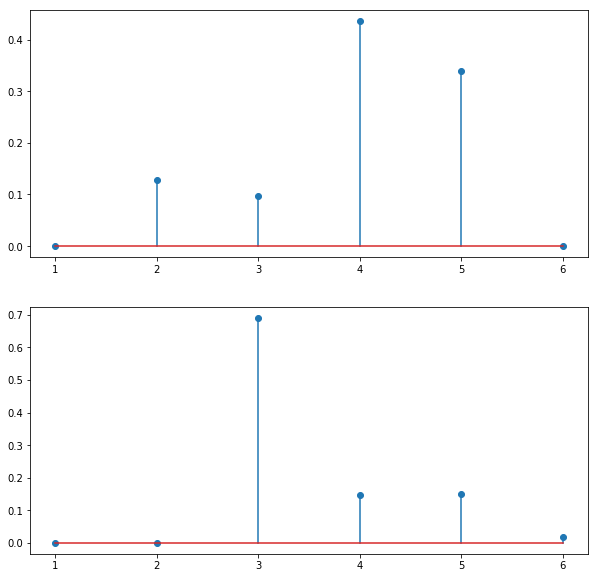

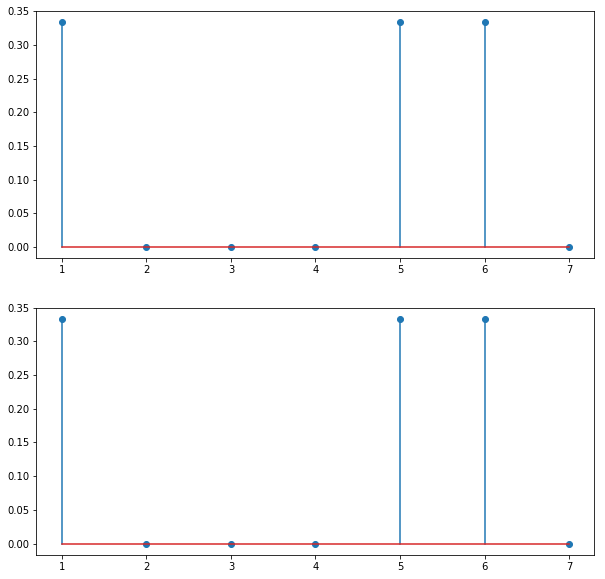

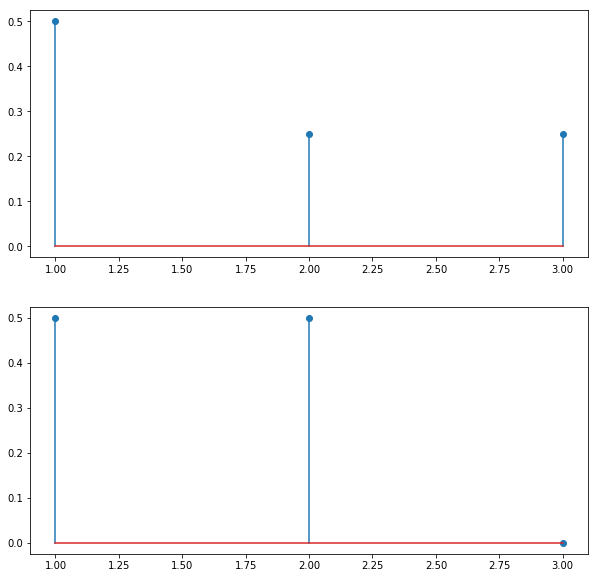

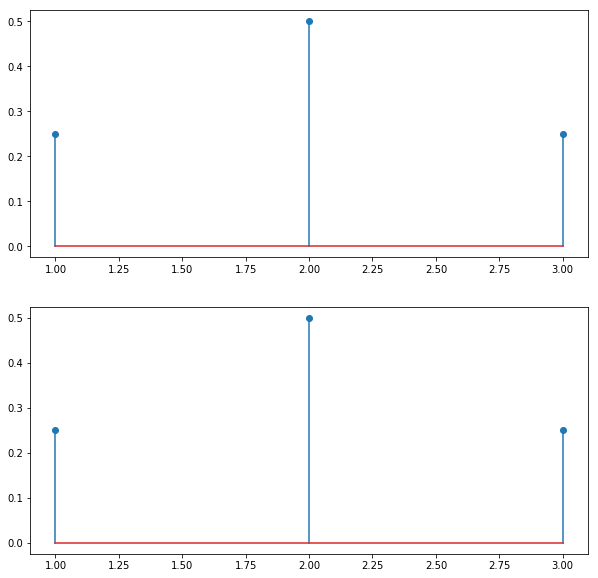

In [5]:
from scipy.optimize import linprog
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt
def plot(p,q):
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax1.stem(range(1, len(p) + 1), p)
    ax2.stem(range(1, len(q) + 1), q)

def frac(cost1, p1, q1):
    p = []
    q = []
    for i in p1:
        p.append(Fraction(*i.as_integer_ratio()).limit_denominator())
    for i in q1:
        q.append(Fraction(*i.as_integer_ratio()).limit_denominator())
    cost = Fraction(*cost1.as_integer_ratio()).limit_denominator()
    return (cost, p, q)


def nash_equilibrium(A):
    str, col = A.shape
    minimum = A.min()
    check = 0
    if (minimum <= 0):
        A = A - minimum + 1
        check = 1
    c = np.array([-1] * col)
    b = np.array([1] * str)
    res = linprog(c, A, b)
    str2 = res.x
    game = 1 / str2.sum()
    str2 = str2 * game

    B = -A.transpose()
    c = np.array([1] * str)
    b = np.array([-1] * col)
    res = linprog(c, B, b)
    str1 = res.x * game
    if (check):
        game = game + minimum - 1
    return (game, str1, str2)

#example from task
matrix = np.array([[4, 0, 6, 2, 2, 1],
              [3, 8, 4, 10, 4, 4],
              [1, 2, 6, 5, 0, 0],
              [6, 6, 4, 4, 10, 3],
              [10, 4, 6, 4, 0, 9],
              [10, 7, 0, 7, 9, 8]])

cost1, p1, q1 =nash_equilibrium(matrix)
plot(p1,q1)
cost, p, q = frac(cost1, p1, q1)
print (cost, p, q,'\n')
#optimal strategy with one point
matrix = np.array ([[0,0,0,0,1,-1,0],
                   [0,0,1,0,0,0,-1],
                   [0,-1,0,0,0,0,1],
                   [0,0,0,0,0,0,0],
                   [-1,0,0,0,0,1,0],
                   [1,0,0,0,-1,0,0],
                   [0,1,-1,0,0,0,0]])
cost1, p1, q1 =nash_equilibrium(matrix)
plot(p1,q1)
cost, p, q = frac(cost1, p1, q1)
print (cost, p, q,'\n')
#the spectrum of the optimal strategy is incomplete
matrix=np.array([[1,1,2],
                [0,2,0],
                [2,0,0]])
cost1, p1, q1 =nash_equilibrium(matrix)
plot(p1,q1)
cost, p, q = frac(cost1, p1, q1)
print (cost, p, q,'\n')
#the spectrum of the optimal strategy is full
matrix=np.array([[-2,3,-4],
                [3,-4,5],
                [-4,5,-6]])
cost1, p1, q1 =nash_equilibrium(matrix)
plot(p1,q1)
cost, p, q = frac(cost1, p1, q1)
print (cost, p, q,'\n')